<a href="https://colab.research.google.com/github/unnatijain99/ADA-Questions-Hacktober-Fest/blob/master/SMS_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries


In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# Dataset Importing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/SMS_Dataset/SMS_Dataset.csv",encoding='latin-1')
data.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Data Visualisation 

Text(0, 0.5, 'Number of Data points')

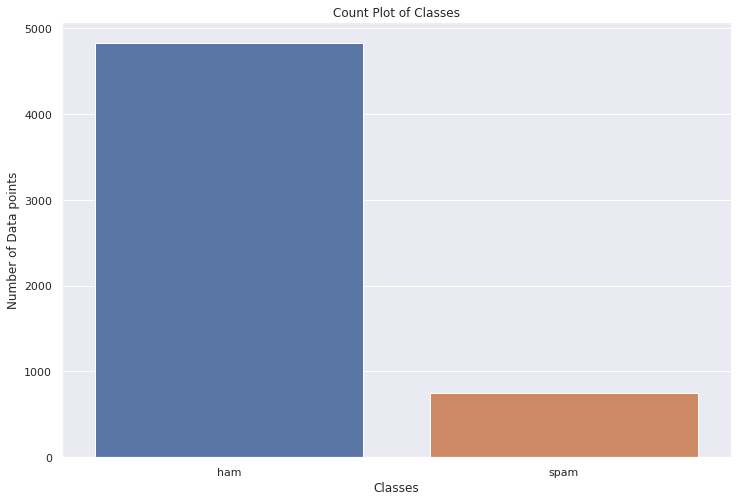

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,8))
fg = sns.countplot(x= data["Target"])
fg.set_title("Count Plot of Classes")
fg.set_xlabel("Classes")
fg.set_ylabel("Number of Data points")

In [ ]:
data["No_of_Characters"] = data["Text"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["Text"]), axis=1).apply(len)
data["No_of_sentence"]=data.apply(lambda row: nltk.sent_tokenize(row["Text"]), axis=1).apply(len)
data.describe()

,No_of_Characters,No_of_Words,No_of_sentence
count,5572.000000,5572.000000,5572.000000
mean,80.332376,18.502692,1.993001
std,59.839027,13.638372,1.503584
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,122.000000,27.000000,2.000000
max,910.000000,219.000000,38.000000


In [ ]:
data = data[(data["No_of_Characters"]<350)]
data.shape

(5548, 5)

<Figure size 864x576 with 0 Axes>

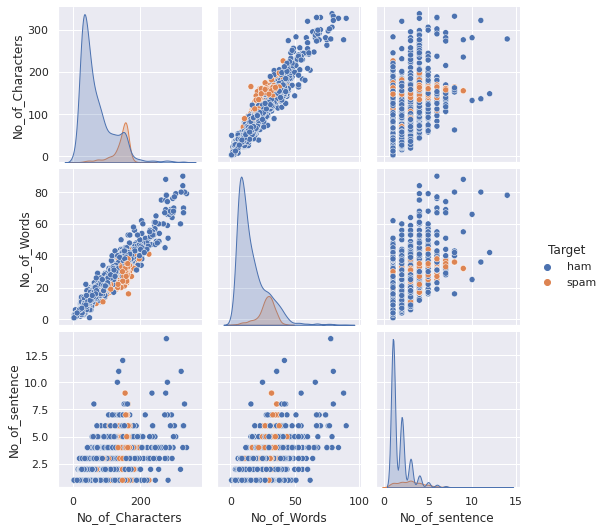

In [ ]:
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
fg = sns.pairplot(data=data, hue="Target")
plt.show(fg)

# Data Preprocessing

Cleaning Data

In [ ]:
def Clean(Text):
    sms = re.sub('[^a-zA-Z]', ' ', Text) 
    sms = sms.lower() 
    sms = sms.split()
    sms = ' '.join(sms)
    return sms
data["Clean_Text"] = data["Text"].apply(Clean)

Tokenizing Data

In [ ]:
data["Tokenize_Text"]=data.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)

Removing Stop Words

In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    #filtered_text = filtered_text.split()
    filtered_text = ' '.join(filtered_text)
    return filtered_text
data["Nostopword_Text"] = data["Tokenize_Text"].apply(remove_stopwords)

Stemming 

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_word(text):
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    #lemmas = lemmas.split()
    lemmas = ''.join(lemmas)
    return lemmas

data["Lemmatized_Text"] = data["Nostopword_Text"].apply(lemmatize_word)

In [ ]:
data.head()

,Target,Text,No_of_Characters,No_of_Words,No_of_sentence,Clean_Text,Tokenize_Text,Nostopword_Text,Lemmatized_Text
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...",go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...",free entry wkly comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...",u dun say early hor u c already say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...",nah think goes usf lives around though,nah think goes usf lives around though


In [ ]:
corpus=data["Lemmatized_Text"]

# Classification 

In [ ]:
y = data.replace(['ham','spam'],[0, 1])['Target']

In [ ]:
y.value_counts()

0    4801
1     747
Name: Target, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(data['Lemmatized_Text']).toarray()

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size= 0.30, random_state = 0)

###**Naive Bayes**
####Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

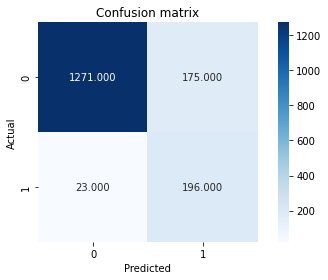

In [ ]:
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest)

conf_matrix = metrics.confusion_matrix(ytest, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
classifiers =[]
accuracy = []
error = []
precision =[]
recall = []
F1_score = []
j=0

In [ ]:
conf = confusion_matrix(ytest, y_pred)
TP = conf[1, 1]
TN = conf[0, 0]
FP = conf[0, 1]
FN = conf[1, 0]
classifiers.append('Naive Bayes')
b=round(accuracy_score(ytest, y_pred),4)
accuracy.append(b)
error.append(1-b)
precision.append(TP / float(FP + TP))
recall.append(TP / float(FN + TP))
F1_score.append(2 * (precision[j] * recall[j]) / (precision[j] +recall[j]))
print([classifiers[j] ,accuracy[j], error[j], precision[j], recall[j], F1_score[j]])
j+=1

['Naive Bayes', 0.8811, 0.1189, 0.5283018867924528, 0.8949771689497716, 0.6644067796610169]


###**Decision Tree**
####Decision tree uses information gain to distinguish between feature subsets and ultimately classifying the instances using their leaf nodes. We have used entropy in this project.

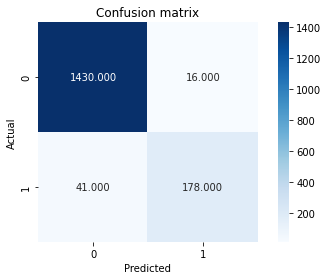

In [ ]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest)

conf_matrix = metrics.confusion_matrix(ytest, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
conf = confusion_matrix(ytest, y_pred)
TP = conf[1, 1]
TN = conf[0, 0]
FP = conf[0, 1]
FN = conf[1, 0]
classifiers.append('Decision Tree')
b=round(accuracy_score(ytest, y_pred),4)
accuracy.append(b)
error.append(1-b)
precision.append(TP / float(FP + TP))
recall.append(TP / float(FN + TP))
F1_score.append(2 * (precision[j] * recall[j]) / (precision[j] +recall[j]))
print([classifiers[j] ,accuracy[j], error[j], precision[j], recall[j], F1_score[j]])
j+=1

['Decision Tree', 0.9658, 0.03420000000000001, 0.9175257731958762, 0.8127853881278538, 0.8619854721549636]


###**Support Vector Machine(SVM)**
####SVM discriminatively distinguishes between multiple classes in the dataset. We have used a linear kernel to classify our dataset.


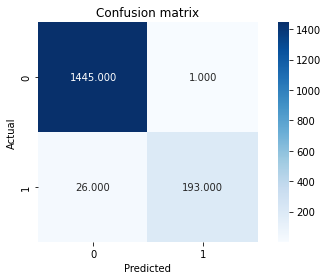

In [ ]:
classifier = SVC(kernel = 'linear') 
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest)

conf_matrix = metrics.confusion_matrix(ytest, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
conf = confusion_matrix(ytest, y_pred)
TP = conf[1, 1]
TN = conf[0, 0]
FP = conf[0, 1]
FN = conf[1, 0]
classifiers.append('SVM')
b=round(accuracy_score(ytest, y_pred),4)
accuracy.append(b)
error.append(1-b)
precision.append(TP / float(FP + TP))
recall.append(TP / float(FN + TP))
F1_score.append(2 * (precision[j] * recall[j]) / (precision[j] +recall[j]))
print([classifiers[j] ,accuracy[j], error[j], precision[j], recall[j], F1_score[j]])
j+=1

['SVM', 0.9838, 0.016199999999999992, 0.9948453608247423, 0.8812785388127854, 0.9346246973365617]


#**Classification TFIDF**
####TF-IDF means Term Frequency - Inverse Document Frequency. This is a statistic that is based on the frequency of a word in the corpus but it also provides a numerical representation of how important a word is for statistical analysis.

####TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

In [ ]:
vec = TfidfVectorizer()
x = vec.fit_transform(data['Lemmatized_Text']).toarray()
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size= 0.30, random_state = 0)

###**Naive Bayes**

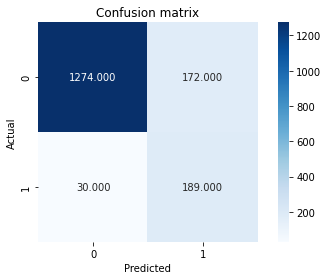

In [ ]:
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest)

conf_matrix = metrics.confusion_matrix(ytest, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
conf = confusion_matrix(ytest, y_pred)
TP = conf[1, 1]
TN = conf[0, 0]
FP = conf[0, 1]
FN = conf[1, 0]
classifiers.append('TFIDF Naive Bayes')
b=round(accuracy_score(ytest, y_pred),4)
accuracy.append(b)
error.append(1-b)
precision.append(TP / float(FP + TP))
recall.append(TP / float(FN + TP))
F1_score.append(2 * (precision[j] * recall[j]) / (precision[j] +recall[j]))
print([classifiers[j] ,accuracy[j], error[j], precision[j], recall[j], F1_score[j]])
j+=1

['TFIDF Naive Bayes', 0.8787, 0.12129999999999996, 0.5235457063711911, 0.863013698630137, 0.6517241379310345]


###**Decision Tree**


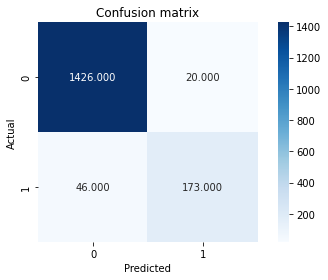

In [ ]:
classifier = DecisionTreeClassifier(random_state=0, criterion='entropy')
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest)

conf_matrix = metrics.confusion_matrix(ytest, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
conf = confusion_matrix(ytest, y_pred)
TP = conf[1, 1]
TN = conf[0, 0]
FP = conf[0, 1]
FN = conf[1, 0]
classifiers.append('TFIDF Decision Tree')
b=round(accuracy_score(ytest, y_pred),4)
accuracy.append(b)
error.append(1-b)
precision.append(TP / float(FP + TP))
recall.append(TP / float(FN + TP))
F1_score.append(2 * (precision[j] * recall[j]) / (precision[j] +recall[j]))
print([classifiers[j] ,accuracy[j], error[j], precision[j], recall[j], F1_score[j]])
j+=1

['TFIDF Decision Tree', 0.9604, 0.03959999999999997, 0.8963730569948186, 0.7899543378995434, 0.8398058252427184]


###**Support Vector Machine(SVM)**

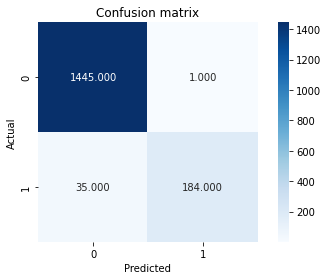

In [ ]:
classifier = SVC(kernel = 'linear') 
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest)

conf_matrix = metrics.confusion_matrix(ytest, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
conf = confusion_matrix(ytest, y_pred)
TP = conf[1, 1]
TN = conf[0, 0]
FP = conf[0, 1]
FN = conf[1, 0]
classifiers.append('TFIDF SVM')
b=round(accuracy_score(ytest, y_pred),4)
accuracy.append(b)
error.append(1-b)
precision.append(TP / float(FP + TP))
recall.append(TP / float(FN + TP))
F1_score.append(2 * (precision[j] * recall[j]) / (precision[j] +recall[j]))
print([classifiers[j] ,accuracy[j], error[j], precision[j], recall[j], F1_score[j]])
j+=1

['TFIDF SVM', 0.9784, 0.021599999999999953, 0.9945945945945946, 0.8401826484018264, 0.9108910891089109]


# Results

In [ ]:
data1 = pd.DataFrame({'Classifier':classifiers, 'Accuracy':accuracy,'Error':error, 'Precison':precision,'Recall':recall,'F1_Measure':F1_score})
data1.head(7)

,Classifier,Accuracy,Error,Precison,Recall,F1_Measure
0,Naive Bayes,0.8811,0.1189,0.528302,0.894977,0.664407
1,Decision Tree,0.9658,0.0342,0.917526,0.812785,0.861985
2,SVM,0.9838,0.0162,0.994845,0.881279,0.934625
3,TFIDF Naive Bayes,0.8787,0.1213,0.523546,0.863014,0.651724
4,TFIDF Decision Tree,0.9604,0.0396,0.896373,0.789954,0.839806
5,TFIDF SVM,0.9784,0.0216,0.994595,0.840183,0.910891


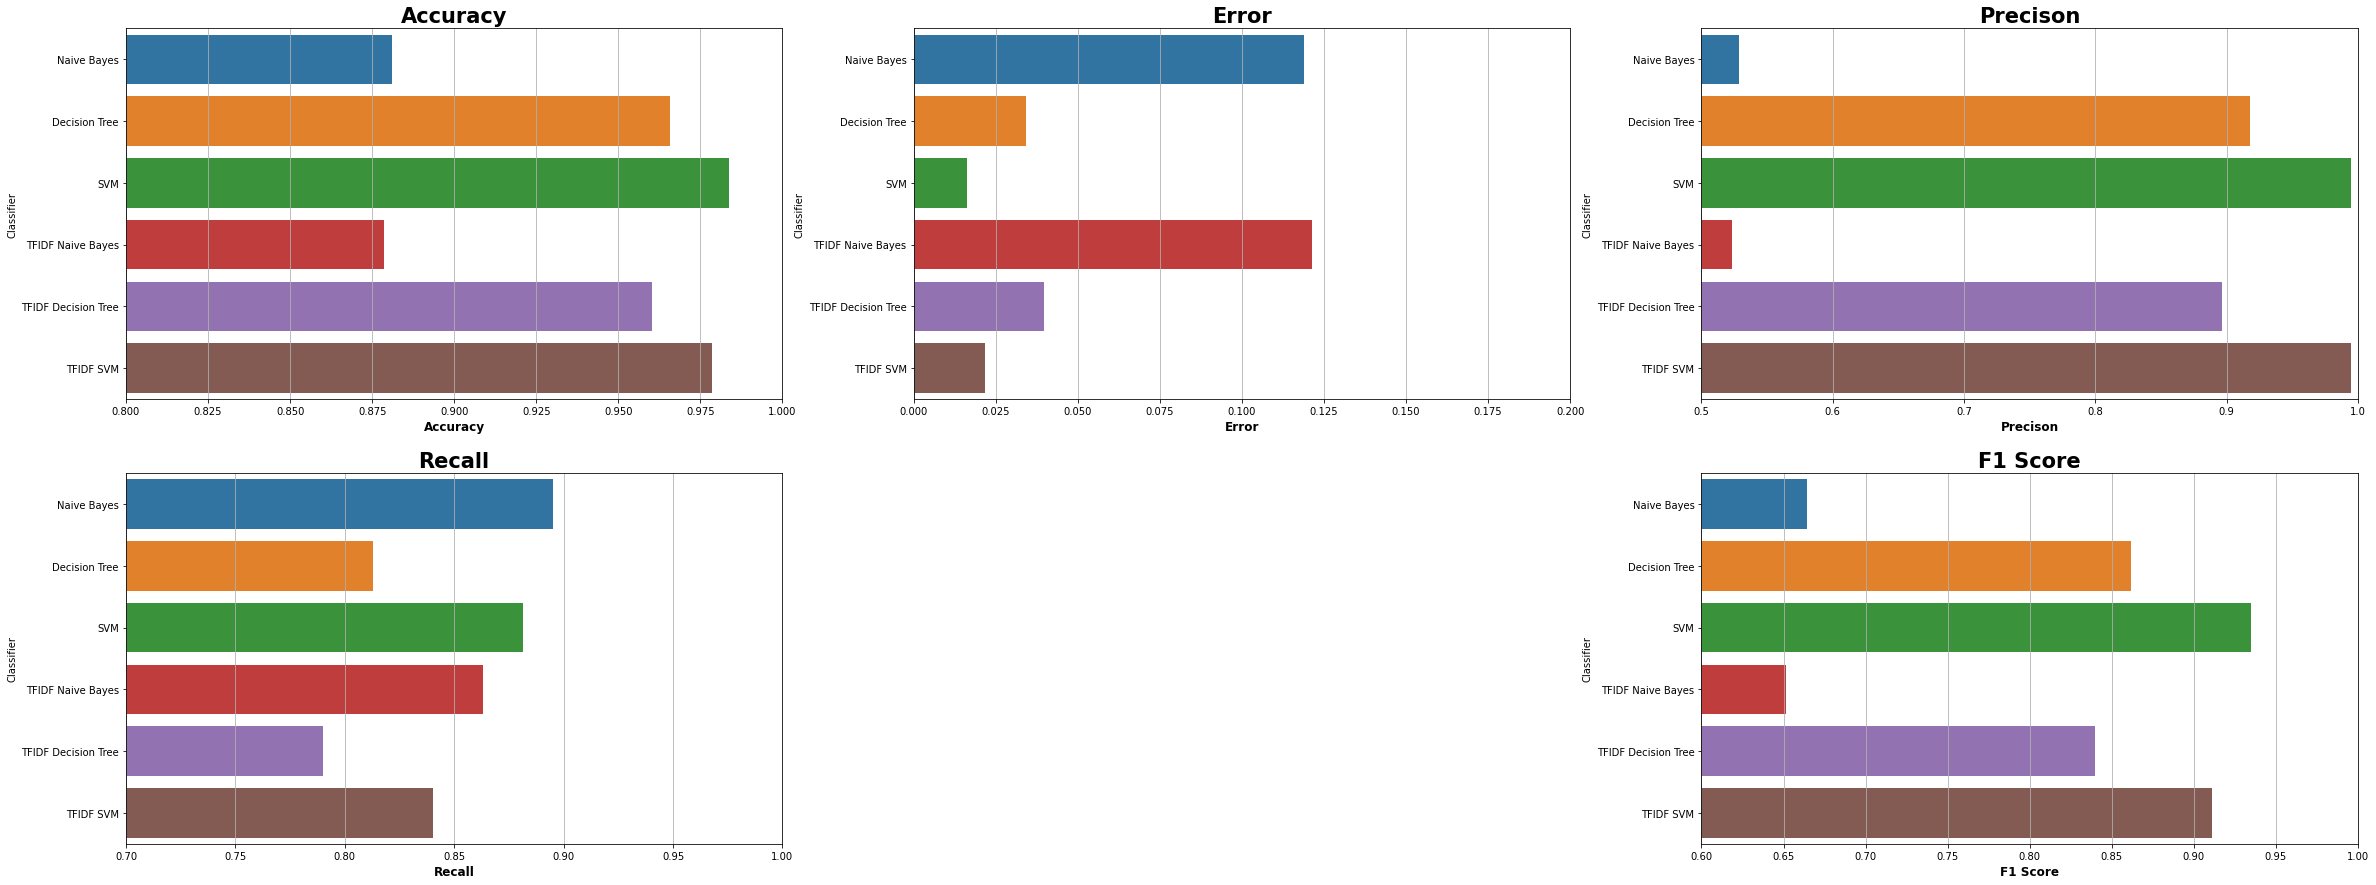

In [ ]:
plt.figure(figsize=(40,15))
plt.subplot(2, 3, 1)
s=sns.barplot(x=data1.Accuracy,y=data1.Classifier)
plt.title('Accuracy',fontsize = 21, fontweight ='bold')
plt.xlabel("Accuracy",fontsize = 12, fontweight ='bold')
plt.xlim(0.8,1.0)
plt.grid(axis='x')
plt.subplot(2, 3, 2)
s=sns.barplot(x=data1.Error,y=data1.Classifier)
plt.title('Error',fontsize = 21, fontweight ='bold')
plt.xlabel("Error",fontsize = 12, fontweight ='bold')
plt.xlim(0.0,0.2)
plt.grid(axis='x')
plt.subplot(2, 3, 3)
s=sns.barplot(x=data1.Precison,y=data1.Classifier)
plt.title('Precison',fontsize = 21, fontweight ='bold')
plt.xlabel("Precison",fontsize = 12, fontweight ='bold')
plt.xlim(0.5,1.0)
plt.grid(axis='x')
plt.subplot(2, 3, 4)
s=sns.barplot(x=data1.Recall,y=data1.Classifier)
plt.title('Recall',fontsize = 21, fontweight ='bold')
plt.xlabel("Recall",fontsize = 12, fontweight ='bold')
plt.xlim(0.7,1.0)
plt.grid(axis='x')
plt.subplot(2, 3, 6)
s=sns.barplot(x=data1.F1_Measure,y=data1.Classifier)
plt.title('F1 Score',fontsize = 21, fontweight ='bold')
plt.xlabel("F1 Score",fontsize = 12, fontweight ='bold')
plt.xlim(0.6,1.0)
plt.grid(axis='x')